## **Опис завдання**

Ти замовив/-ла виконання дослідження ефективності роботи співробітників і отримав/-ла наближену залежність ефективності роботи (кількість тасків за одиницю часу) від часу доби, за умови, що завдання однакові за складністю.

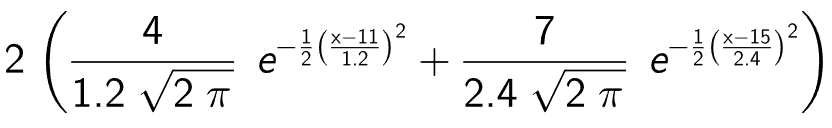

Позначимо початок і кінець робочого дня як a=9 та b=18 відповідно.

Тобі буде потрібно порахувати середню кількість тасків, виконаних упродовж робочого дня (в робочі години з 9 до 18).

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Визначимо функцію, яку ми будемо інтегрувати
def integrand_np(x):
    return 2 * (4 / (1.2 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - 11) / 1.2) ** 2) +
                7 / (2.4 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - 15) / 2.4) ** 2))

def integrand_sp(x):
    return 2 * (4 / (1.2 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 11) / 1.2) ** 2) +
                7 / (2.4 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 15) / 2.4) ** 2))

# Задамо межі інтегрування
a = 9; b = 18

### **Завдання 1**
Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

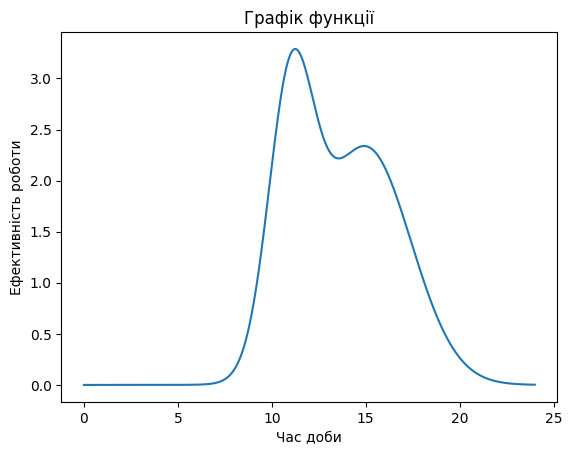

In [ ]:
# Задана функція
x = np.linspace(0, 24, 1000)
y = integrand_np(x)

plt.plot(x, y)
plt.title('Графік функції')
plt.xlabel('Час доби')
plt.ylabel('Ефективність роботи')
plt.show()

In [ ]:
# Визначення символьних змінних
x_sym = sp.symbols('x')

# Задана функція
func = integrand_sp(x_sym)

# Невизначений інтеграл функції
indefinite_integral = sp.integrate(func, x_sym)

# Інтеграл від a до b
definite_integral = sp.integrate(func, (x_sym, a, b))

print("Невизначений інтеграл:")
print(indefinite_integral)

print("\nІнтеграл від a до b:")
print(definite_integral.evalf())

Невизначений інтеграл:
4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)

Інтеграл від a до b:
20.0516450141883


###**Завдання 2**
Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.

In [ ]:
def rectangle_integration(func, a, b, n):
    """
    Чисельне інтегрування методом прямокутників.

    Параметри:
    - func: функція для інтегрування
    - a, b: межі інтегрування
    - n: кількість прямокутників (крок інтегрування)

    Повертає:
    - Значення інтегралу
    """
    h = (b - a) / n
    result = 0

    for i in range(n):
        x_i = a + i * h
        result += func(x_i)

    result *= h
    return result

# Задаємо кількість прямокутників
n = 1000

# Використовуємо функцію чисельного інтегрування методом прямокутників
result = rectangle_integration(integrand_np, a, b, n)

print("Значення інтегралу методом прямокутників:", result)

Значення інтегралу методом прямокутників: 20.050284225265752


###**Завдання 3**
Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.

In [ ]:
def trapezoidal_integration(func, a, b, n):
    """
    Чисельне інтегрування методом трапецій.

    Параметри:
    - func: функція для інтегрування
    - a, b: межі інтегрування
    - n: кількість трапецій (крок інтегрування)

    Повертає:
    - Значення інтегралу
    """
    h = (b - a) / n
    result = 0.5 * (func(a) + func(b))

    for i in range(1, n):
        x_i = a + i * h
        result += func(x_i)

    result *= h
    return result

# Задаємо кількість трапецій
n = 1000

# Використовуємо функцію чисельного інтегрування методом трапеції
result_trapezoidal = trapezoidal_integration(integrand_np, a, b, n)

print("Значення інтегралу методом трапецій:", result_trapezoidal)

Значення інтегралу методом трапецій: 20.051634332194123


###**Завдання 4**
Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від a до b.

In [ ]:
def simpson_integration(func, a, b, n):
    """
    Чисельне інтегрування методом Сімпсона.

    Параметри:
    - func: функція для інтегрування
    - a, b: межі інтегрування
    - n: кількість вузлів (половина кількості підінтервалів)

    Повертає:
    - Значення інтегралу
    """
    h = (b - a) / (2 * n)
    result = func(a) + func(b)

    for i in range(1, 2 * n):
        x_i = a + i * h
        factor = 4 if i % 2 == 1 else 2
        result += factor * func(x_i)

    result *= h / 3
    return result

# Задаємо кількість вузлів
n = 500

# Використовуємо функцію чисельного інтегрування методом Сімпсона
result_simpson = simpson_integration(integrand_np, a, b, n)

print("Значення інтегралу методом Сімпсона:", result_simpson)

Значення інтегралу методом Сімпсона: 20.05164501419633


###**Завдання 5**
Порахуй інтеграл від a до b за допомогою функції scipy.integrate.quad.

In [ ]:
from scipy import integrate

# Використовуємо функцію чисельного інтегрування quad
result_scipy, error = integrate.quad(integrand_np, a, b)

print("Значення інтегралу методом quad:", result_scipy)

Значення інтегралу методом quad: 20.051645014188296
